In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
random.seed()

In [2]:
keno2022 = pd.read_csv("KenoCurrentYear.csv")
keno2021 = pd.read_csv("KenoPastYears/KenoYear2021.csv")
keno2020 = pd.read_csv("KenoPastYears/KenoYear2020.csv")
keno2019 = pd.read_csv("KenoPastYears/KenoYear2019.csv")
keno2018 = pd.read_csv("KenoPastYears/KenoYear2018.csv")
frames = [keno2018,keno2019, keno2020, keno2021,keno2022]
keno = pd.concat(frames)

In [3]:
keno = keno.drop(["PRODUCT","DRAW NUMBER","DRAW DATE"],axis = 1)

In [4]:
def decode_bonus_multiplier(bonus):
    if bonus == 1:
        return 1.5
    elif bonus == 2:
        return 2
    elif bonus == 3:
        return 5
    elif bonus == 4:
        return 7
    else:
        return 10

In [5]:
def scenarios(number_of_picks, number_of_correct_guesses):
    prize = 0
    
    if number_of_picks == 1:
        if number_of_correct_guesses == 1:
            prize = 2
        
    elif number_of_picks == 2:
        if number_of_correct_guesses == 2:
            prize = 10
    
    elif number_of_picks == 3:
        if number_of_correct_guesses == 3:
            prize = 25
        elif number_of_correct_guesses == 2:
            prize = 2
    
    elif number_of_picks == 4:
        if number_of_correct_guesses == 4:
            prize = 50
        elif number_of_correct_guesses == 3:
            prize = 5
        elif number_of_correct_guesses == 2:
            prize = 1
            
    elif number_of_picks == 5:
        if number_of_correct_guesses == 5:
            prize = 500
        elif number_of_correct_guesses == 4:
            prize = 15
        elif number_of_correct_guesses == 3:
            prize = 2
            
    elif number_of_picks == 6:
        if number_of_correct_guesses == 6:
            prize = 1500
        elif number_of_correct_guesses == 5:
            prize = 50
        elif number_of_correct_guesses == 4:
            prize = 5
        elif number_of_correct_guesses == 3:
            prize = 1
            
    elif number_of_picks == 7:
        if number_of_correct_guesses == 7:
            prize = 5000
        elif number_of_correct_guesses == 6:
            prize = 150
        elif number_of_correct_guesses == 5:
            prize = 15
        elif number_of_correct_guesses == 4:
            prize = 2
        elif number_of_correct_guesses == 3:
            prize = 1
        
    elif number_of_picks == 8:
        if number_of_correct_guesses == 8:
            prize = 15000
        elif number_of_correct_guesses == 7:
            prize = 400
        elif number_of_correct_guesses == 6:
            prize = 50
        elif number_of_correct_guesses == 5:
            prize = 10
        elif number_of_correct_guesses == 4:
            prize = 2
            
    elif number_of_picks == 9:
        if number_of_correct_guesses == 9:
            prize = 25000
        elif number_of_correct_guesses == 8:
            prize = 2500
        elif number_of_correct_guesses == 7:
            prize = 200
        elif number_of_correct_guesses == 6:
            prize = 25
        elif number_of_correct_guesses == 5:
            prize = 4
        elif number_of_correct_guesses == 4:
            prize = 1
            
    elif number_of_picks == 10:
        if number_of_correct_guesses == 10:
            prize = 200000
        elif number_of_correct_guesses == 9:
            prize = 10000
        elif number_of_correct_guesses == 8:
            prize = 500
        elif number_of_correct_guesses == 7:
            prize = 50
        elif number_of_correct_guesses == 6:
            prize = 10
        elif number_of_correct_guesses == 5:
            prize = 3
        elif number_of_correct_guesses == 0:
            prize = 3
    else:
        print("Invalid number of picks. Enter a number between from 1 to 10.")
        prize = 0
        
    return prize

In [326]:
def play_keno(starting_money, number_of_plays, number_of_picks = None, bonus_boolean = False, strategy = None):
    """
    starting_money : Money you are starting with
    number_of_plays: Specifies the number of plays
    number_of_picks: Specific number of picks. It should between 1 to 10.
    bonus_boolean: Bonus option, costs 1$ extra
    strategy: Specifies strategy. None, "look_behind", "fixed_et"
    """
    money = starting_money
    
    
    for m in range(number_of_plays):        
        
        nth_random_draw = random.randint(1, len(keno)) # Select a random draw
        draw = keno.iloc[nth_random_draw].values.flatten() # Create a list of numbers
        draw = draw[1:] # Draw numbers
        bonus_encoded = draw[0] # Bonus is the first element of the list. It is encoded.
        bonus_multiplier = 1 # Default values of bonus is 1
        money -= 1 # Each game costs 1$ to play

        if bonus_boolean == True:
            money -= 1 # It costs 1$ extra to buy Keno Bonus
            bonus_multiplier = decode_bonus_multiplier(bonus_encoded) # Decode bonuses
        
        set_of_numbers = np.arange(1,81) # Numbers are from 1-80
        
        if strategy == None:
            
            """
            Randomly picks a set of numbers.
            """
            
            selection = random.sample(sorted(set_of_numbers), number_of_picks) # Player randomly picks numbers between 1 to 80.
        
        elif strategy == "look_behind":
            
            """
            Excludes numbers from the previous draw.
            
            """
            previous_draw = keno.iloc[nth_random_draw - 1].values.flatten() #Look up the result of previous draw
            previous_draw = previous_draw[1:] #Previous draw numbers
            set_of_numbers = np.setdiff1d(set_of_numbers, previous_draw) # Exclude previously drew numbers from the set
            selection = random.sample(sorted(set_of_numbers), number_of_picks) # Pick a random set of numbers from the excluded set.
        
        elif strategy == "fixed_set":
            
            """
            Always pick a fixed set of numbers.
            """
            
            selection = np.arange(10, 10 + number_of_picks) 
            
        
        number_of_correct_guesses =  len(np.intersect1d(draw, selection)) # Number of correct picks
        
        money += bonus_multiplier * scenarios(number_of_picks, number_of_correct_guesses)
        
    return money

/Users/uozdemir/miniforge3/envs/np_accelerate/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


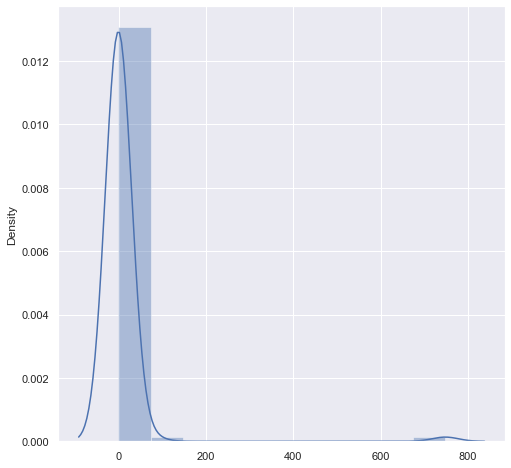

In [505]:
sns.set(rc = {'figure.figsize':(8,8)})
earning_averages = []
for _ in range(100):
    money = 0
    for number_of_picks in [7]:#np.arange(1,11):
        starting_money = 0
        number_of_plays = 1
        # number_of_picks = 6

        bonus = True

        money += play_keno(starting_money, number_of_plays, number_of_picks, bonus, strategy = None)
    earning_averages.append(money)
sns.distplot(earning_averages)
plt.savefig('earnings.png')

/Users/uozdemir/miniforge3/envs/np_accelerate/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


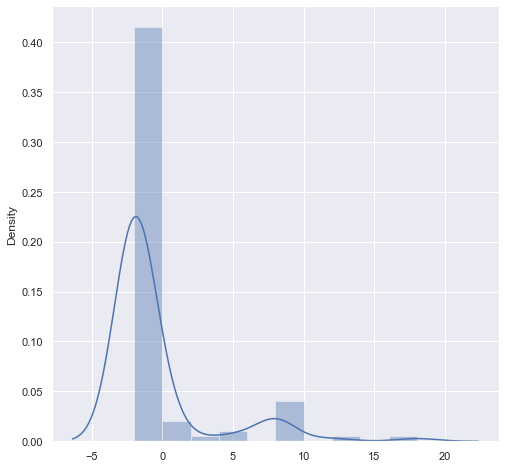

In [506]:
sns.set(rc = {'figure.figsize':(8,8)})
earning_averages = []
for _ in range(100):
    money = 0
    for number_of_picks in [7]:#np.arange(1,11):
        starting_money = 0
        number_of_plays = 1
        # number_of_picks = 6

        bonus = True

        money += play_keno(starting_money, number_of_plays, number_of_picks, bonus, strategy = "fixed_set")
    earning_averages.append(money)
sns.distplot(earning_averages)
plt.savefig('earnings.png')

/Users/uozdemir/miniforge3/envs/np_accelerate/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


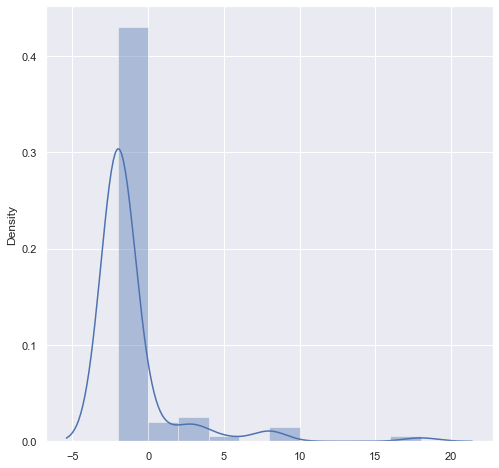

In [522]:
sns.set(rc = {'figure.figsize':(8,8)})
earning_averages = []
for _ in range(100):
    money = 0
    for number_of_picks in [7]:#np.arange(1,11):
        starting_money = 0
        number_of_plays = 1
        # number_of_picks = 6

        bonus = True

        money += play_keno(starting_money, number_of_plays, number_of_picks, bonus, strategy = "look_behind")
    earning_averages.append(money)
sns.distplot(earning_averages)
plt.savefig('earnings.png')